# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 638


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"
baseURL = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{baseURL}{city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bubaque
Processing Record 2 of Set 1 | kirakira
Processing Record 3 of Set 1 | seddon
Processing Record 4 of Set 1 | qaanaaq
Processing Record 5 of Set 1 | cairns
Processing Record 6 of Set 1 | new norfolk
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 1 | baglan
Processing Record 9 of Set 1 | mahebourg
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | sikonge
Processing Record 12 of Set 1 | pangnirtung
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | castro
Processing Record 16 of Set 1 | halifax
Processing Record 17 of Set 1 | barrow
Processing Record 18 of Set 1 | arroyo
Processing Record 19 of Set 1 | talara
Processing Record 20 of Set 1 | luderitz
Processing Record 21 of Set 1 | hobart
Processing Record 22 of Set 1 | makung
City not found. Skipping...


Processing Record 37 of Set 4 | ponta delgada
Processing Record 38 of Set 4 | saryg-sep
Processing Record 39 of Set 4 | goya
Processing Record 40 of Set 4 | san cristobal
Processing Record 41 of Set 4 | alofi
Processing Record 42 of Set 4 | butaritari
Processing Record 43 of Set 4 | yaan
Processing Record 44 of Set 4 | new glasgow
Processing Record 45 of Set 4 | barberton
Processing Record 46 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 47 of Set 4 | chiang klang
Processing Record 48 of Set 4 | christchurch
Processing Record 49 of Set 4 | tura
Processing Record 0 of Set 5 | wembley
Processing Record 1 of Set 5 | meulaboh
Processing Record 2 of Set 5 | luba
Processing Record 3 of Set 5 | ayan
Processing Record 4 of Set 5 | carutapera
Processing Record 5 of Set 5 | talnakh
Processing Record 6 of Set 5 | westport
Processing Record 7 of Set 5 | inirida
Processing Record 8 of Set 5 | mendoza
Processing Record 9 of Set 5 | tuktoyaktuk
Processing Record 10 of Set 5 | t

Processing Record 29 of Set 8 | banda aceh
Processing Record 30 of Set 8 | kaitangata
Processing Record 31 of Set 8 | kisangani
Processing Record 32 of Set 8 | yenotayevka
Processing Record 33 of Set 8 | klaksvik
Processing Record 34 of Set 8 | paamiut
Processing Record 35 of Set 8 | kavaratti
Processing Record 36 of Set 8 | chizhou
Processing Record 37 of Set 8 | sumenep
Processing Record 38 of Set 8 | soe
Processing Record 39 of Set 8 | nea malgara
Processing Record 40 of Set 8 | faxinal
Processing Record 41 of Set 8 | nantucket
Processing Record 42 of Set 8 | tilichiki
Processing Record 43 of Set 8 | rawannawi
City not found. Skipping...
Processing Record 44 of Set 8 | bratsk
Processing Record 45 of Set 8 | manggar
Processing Record 46 of Set 8 | boralday
Processing Record 47 of Set 8 | siedlce
Processing Record 48 of Set 8 | nishihara
Processing Record 49 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 0 of Set 9 | kamloops
Processing Record 1 of Set 9 | khow

Processing Record 18 of Set 12 | terpinnya
Processing Record 19 of Set 12 | carroll
Processing Record 20 of Set 12 | madhupur
Processing Record 21 of Set 12 | sambava
Processing Record 22 of Set 12 | darnah
Processing Record 23 of Set 12 | makakilo city
Processing Record 24 of Set 12 | matara
Processing Record 25 of Set 12 | bandarbeyla
Processing Record 26 of Set 12 | hami
Processing Record 27 of Set 12 | tinguindin
Processing Record 28 of Set 12 | puerto del rosario
Processing Record 29 of Set 12 | hualmay
Processing Record 30 of Set 12 | bad essen
Processing Record 31 of Set 12 | zhigansk
Processing Record 32 of Set 12 | hay river
Processing Record 33 of Set 12 | meiktila
Processing Record 34 of Set 12 | coesfeld
Processing Record 35 of Set 12 | aranos
Processing Record 36 of Set 12 | beringovskiy
Processing Record 37 of Set 12 | bay roberts
Processing Record 38 of Set 12 | villa del rosario
Processing Record 39 of Set 12 | cap malheureux
Processing Record 40 of Set 12 | wanaka
Proc

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          591
Lat           591
Lng           591
Max Temp      591
Humidity      591
Cloudiness    591
Wind Speed    591
Country       591
Date          591
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bubaque,11.2833,-15.8333,24.68,68,35,8.17,GW,1678058261
1,kirakira,-10.4544,161.9205,28.97,72,84,5.00,SB,1678058223
2,seddon,-37.8068,144.8916,19.56,62,40,7.20,AU,1678058261
3,qaanaaq,77.4840,-69.3632,-3.36,72,100,2.04,GL,1678058085
4,cairns,-16.9167,145.7667,25.04,100,100,1.54,AU,1678058045


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label = "City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col = "City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bubaque,11.2833,-15.8333,24.68,68,35,8.17,GW,1678058261
1,kirakira,-10.4544,161.9205,28.97,72,84,5.00,SB,1678058223
2,seddon,-37.8068,144.8916,19.56,62,40,7.20,AU,1678058261
3,qaanaaq,77.4840,-69.3632,-3.36,72,100,2.04,GL,1678058085
4,cairns,-16.9167,145.7667,25.04,100,100,1.54,AU,1678058045


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

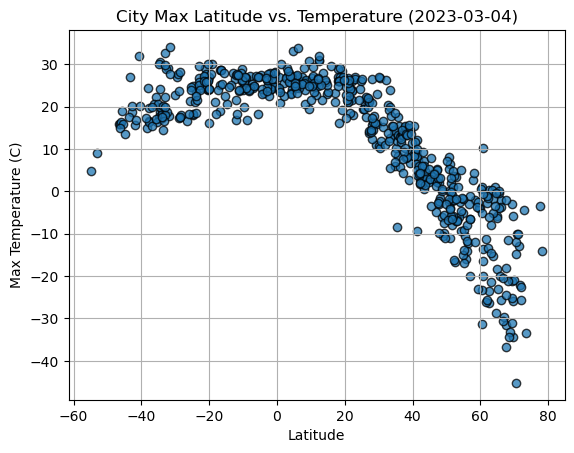

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker = "o", edgecolors = "black", alpha = 0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2023-03-04)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/figure1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

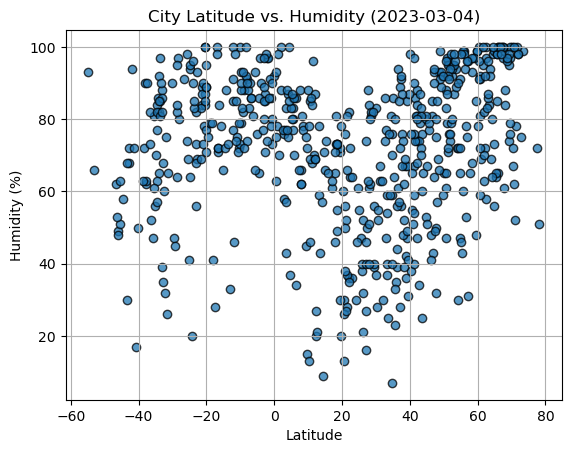

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker = "o", edgecolors = "black", alpha = 0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2023-03-04)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/figure2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

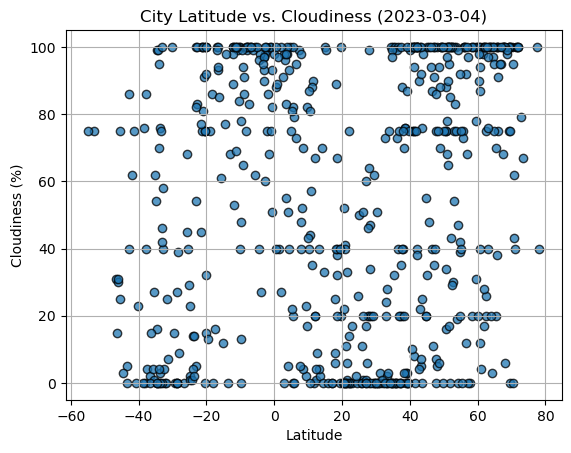

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker = "o", edgecolors = "black", alpha = 0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2023-03-04)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/figure3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

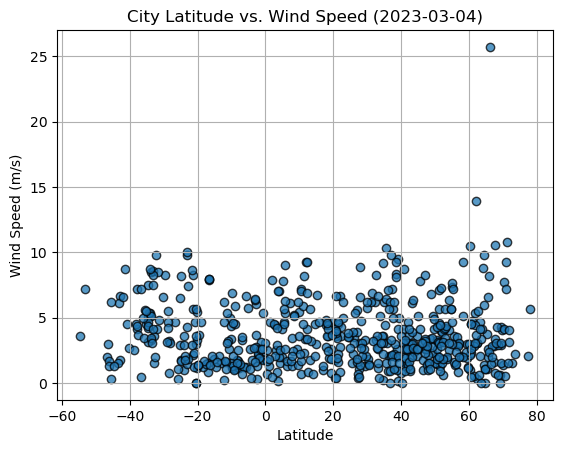

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker = "o", edgecolors = "black", alpha = 0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2023-03-04)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/figure4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linearRegressionFunc(xvalue, yvalue):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xvalue, yvalue)
    regressionValue = xvalue * slope + intercept
    lineEQ = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
    
    plt.scatter(xvalue,yvalue, edgecolors = "black", alpha = 0.75, s = 35)
    plt.plot(xvalue,regressionValue,"red")
    
    print(f"The r-value is: {rvalue**2}")
    return lineEQ

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bubaque,11.2833,-15.8333,24.68,68,35,8.17,GW,1678058261
3,qaanaaq,77.4840,-69.3632,-3.36,72,100,2.04,GL,1678058085
6,baglan,36.1307,68.7083,15.45,44,73,0.91,AF,1678058262
10,pangnirtung,66.1451,-65.7125,-2.00,100,75,25.72,CA,1678058264
14,halifax,44.6453,-63.5724,2.61,53,55,3.58,CA,1678057832


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kirakira,-10.4544,161.9205,28.97,72,84,5.00,SB,1678058223
2,seddon,-37.8068,144.8916,19.56,62,40,7.20,AU,1678058261
4,cairns,-16.9167,145.7667,25.04,100,100,1.54,AU,1678058045
5,new norfolk,-42.7826,147.0587,18.82,68,86,1.79,AU,1678058262
7,mahebourg,-20.4081,57.7000,24.16,100,75,0.00,MU,1678058262


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.8089372070206027


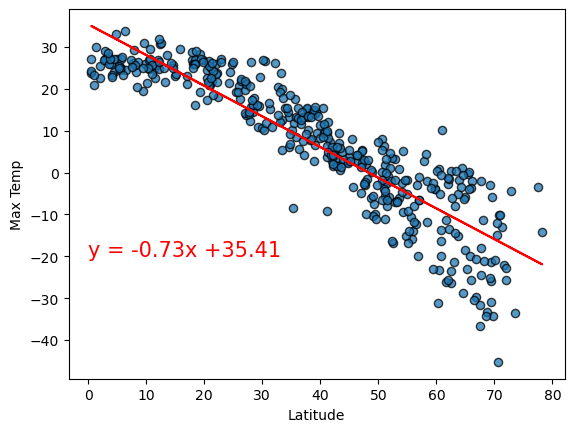

In [15]:
# Linear regression on Northern Hemisphere
northernHemisphere = linearRegressionFunc(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
northernHemisphere

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(northernHemisphere, (0, -20), fontsize = 15, color = "red")
plt.show()

The r-value is: 0.28637366385337715


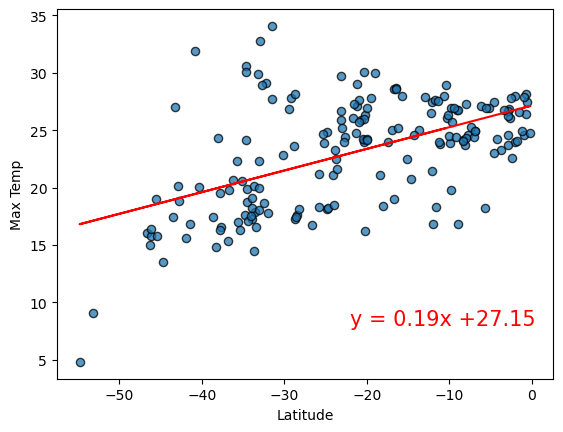

In [16]:
# Linear regression on Southern Hemisphere
southernHemisphere = linearRegressionFunc(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
southernHemisphere

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(southernHemisphere, (-22, 8), fontsize = 15, color = "red")
plt.show()

**Discussion about the linear relationship:**
With a correlation coefficient of approximately -0.78, we can observe that, within the northern hemisphere, there is a strong negative correlation with the latitude and maximum temperature of a city. However, within the southern hemisphere, there is a weak albeit positive correlation between latitude and maximum temperature of a city with an r-value of 0.21.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.11414460279340709


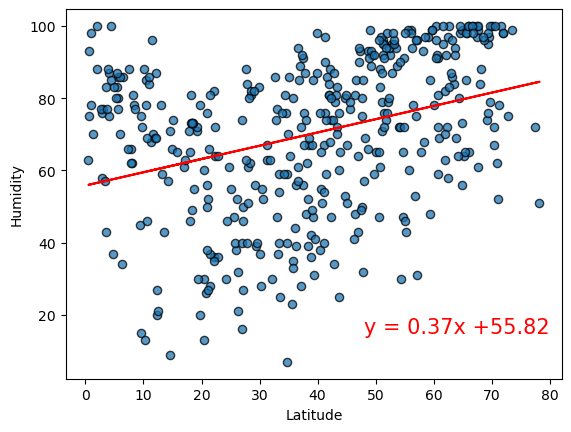

In [17]:
# Northern Hemisphere
northernHemisphere = linearRegressionFunc(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
northernHemisphere

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(northernHemisphere, (48, 15), fontsize = 15, color = "red")
plt.show()

The r-value is: 0.1512851428174761


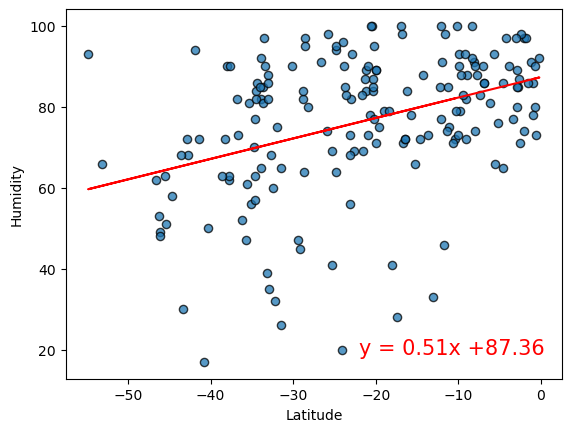

In [18]:
# Southern Hemisphere
southernHemisphere = linearRegressionFunc(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
southernHemisphere

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(southernHemisphere, (-22, 19), fontsize = 15, color = "red")
plt.show()

**Discussion about the linear relationship:** The correlation coefficient comparing latitude versus humidity in cities in both the northern and southern hemisphere are weakly positive at approximately 0.17 and 0.30 respectively.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.09239754079575624


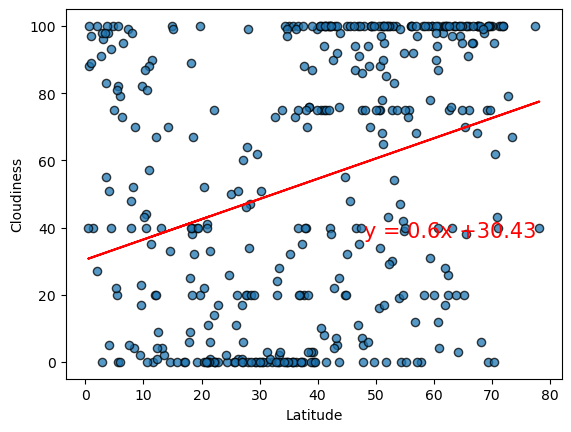

In [19]:
# Northern Hemisphere
northernHemisphere = linearRegressionFunc(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
northernHemisphere

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(northernHemisphere, (48, 37), fontsize = 15, color = "red")
plt.show()

The r-value is: 0.2833450818941798


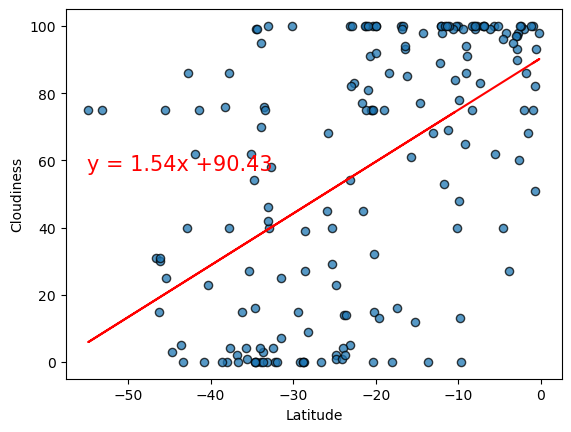

In [20]:
# Southern Hemisphere
southernHemisphere = linearRegressionFunc(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
southernHemisphere

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(southernHemisphere, (-55, 57), fontsize = 15, color = "red")
plt.show()

**Discussion about the linear relationship:** The correlation coefficient of both our northern hemisphere and southern hemisphere data is very weakly positive at 0.08 and 0.19 respectively; there is no correclation between a city's latitude and amount of cloud coverage, regardless of the hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 2.2351419678161804e-05


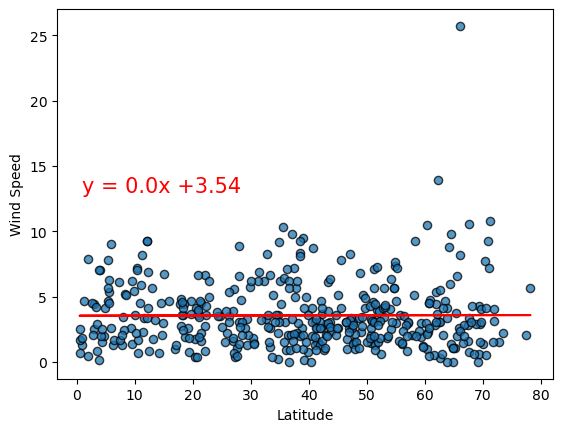

In [21]:
# Northern Hemisphere
northernHemisphere = linearRegressionFunc(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
northernHemisphere

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(northernHemisphere, (1, 13), fontsize = 15, color = "red")
plt.show()

The r-value is: 0.08251980577758504


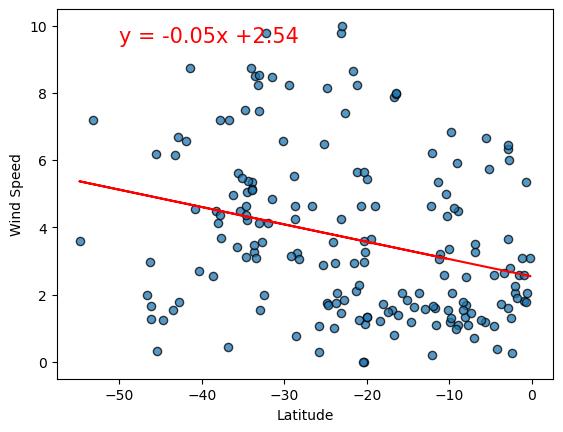

In [22]:
# Southern Hemisphere
southernHemisphere = linearRegressionFunc(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
southernHemisphere

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(southernHemisphere, (-50, 9.5), fontsize = 15, color = "red")
plt.show()

**Discussion about the linear relationship:** With an r-value of less than 0.01, we can see there is no correlation between the wind speed and latitude of a city in the northern hemisphere. We come to a similar conclusion in the southern hemisphere, with an r-value of 0.11. There is very little correlation between the wind speed and latitude of a city in the southern hemisphere.